# PCOS Prediction Model

## Importing libraries and reading dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

#accessing data
df = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name="Full_new")


In [2]:
#accessing data
df = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name="Full_new")
df.head().T

,0,1,2,3,4
Sl. No,1,2,3,4,5
Patient File No.,1,2,3,4,5
PCOS (Y/N),0,0,1,0,0
Age (yrs),28,36,33,37,25
Weight (Kg),44.6,65.0,68.8,65.0,52.0
Height(Cm),152.0,161.5,165.0,148.0,161.0
BMI,19.3,24.921163,25.270891,29.674945,20.060954
Blood Group,15,15,11,13,11
Pulse rate(bpm),78,74,72,72,72
RR (breaths/min),22,20,18,20,18


## Data Cleaning

In [3]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [4]:
#removing space from column names and unnecessary columns
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
df = df.drop(['Sl._No','Patient_File_No.','Blood_Group','Pulse_rate(bpm)','RR_(breaths/min)','Hb(g/dl)','Marraige_Status_(Yrs)','Pregnant(Y/N)','No._of_aborptions','I___beta-HCG(mIU/mL)','II____beta-HCG(mIU/mL)'], axis=1)
df = df.drop(df.columns[-1], axis = 1)

In [5]:
df['Cycle(R/I)'].unique()

array([2, 4, 5], dtype=int64)

In [6]:
#changing data type of object type variables
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].replace('a',df['AMH(ng/mL)'].value_counts().idxmax())
df['Cycle(R/I)'] = df['Cycle(R/I)'].replace(5,4)
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].astype(float)


In [7]:
#filling missing values with mean and median of the column
df['Fast_food_(Y/N)'] = df['Fast_food_(Y/N)'].fillna(value =  df['Fast_food_(Y/N)'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PCOS_(Y/N)            541 non-null    int64  
 1   Age_(yrs)             541 non-null    int64  
 2   Weight_(Kg)           541 non-null    float64
 3   Height(Cm)            541 non-null    float64
 4   BMI                   541 non-null    float64
 5   Cycle(R/I)            541 non-null    int64  
 6   Cycle_length(days)    541 non-null    int64  
 7   FSH(mIU/mL)           541 non-null    float64
 8   LH(mIU/mL)            541 non-null    float64
 9   FSH/LH                541 non-null    float64
 10  Hip(inch)             541 non-null    int64  
 11  Waist(inch)           541 non-null    int64  
 12  Waist:Hip_Ratio       541 non-null    float64
 13  TSH_(mIU/L)           541 non-null    float64
 14  AMH(ng/mL)            541 non-null    float64
 15  PRL(ng/mL)            5

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PCOS_(Y/N)            541 non-null    int64  
 1   Age_(yrs)             541 non-null    int64  
 2   Weight_(Kg)           541 non-null    float64
 3   Height(Cm)            541 non-null    float64
 4   BMI                   541 non-null    float64
 5   Cycle(R/I)            541 non-null    int64  
 6   Cycle_length(days)    541 non-null    int64  
 7   FSH(mIU/mL)           541 non-null    float64
 8   LH(mIU/mL)            541 non-null    float64
 9   FSH/LH                541 non-null    float64
 10  Hip(inch)             541 non-null    int64  
 11  Waist(inch)           541 non-null    int64  
 12  Waist:Hip_Ratio       541 non-null    float64
 13  TSH_(mIU/L)           541 non-null    float64
 14  AMH(ng/mL)            541 non-null    float64
 15  PRL(ng/mL)            5

In [9]:
df.nunique()

PCOS_(Y/N)                2
Age_(yrs)                29
Weight_(Kg)             117
Height(Cm)               50
BMI                     355
Cycle(R/I)                2
Cycle_length(days)       12
FSH(mIU/mL)             371
LH(mIU/mL)              342
FSH/LH                  512
Hip(inch)                19
Waist(inch)              23
Waist:Hip_Ratio          96
TSH_(mIU/L)             308
AMH(ng/mL)              300
PRL(ng/mL)              481
Vit_D3_(ng/mL)          331
PRG(ng/mL)               89
RBS(mg/dl)               55
Weight_gain(Y/N)          2
hair_growth(Y/N)          2
Skin_darkening_(Y/N)      2
Hair_loss(Y/N)            2
Pimples(Y/N)              2
Fast_food_(Y/N)           2
Reg.Exercise(Y/N)         2
BP__Systolic_(mmHg)       6
BP__Diastolic_(mmHg)      5
Follicle_No._(L)         21
Follicle_No._(R)         20
Avg._F_size_(L)_(mm)     31
Avg._F_size_(R)_(mm)     32
Endometrium_(mm)         91
dtype: int64

In [10]:
df.describe().T.style.background_gradient(cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
PCOS_(Y/N),541.000000,0.327172,0.469615,0.000000,0.000000,0.000000,1.000000,1.000000
Age_(yrs),541.000000,31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
Weight_(Kg),541.000000,59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.000000
Height(Cm),541.000000,156.484835,6.033545,137.000000,152.000000,156.000000,160.000000,180.000000
BMI,541.000000,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.900000
Cycle(R/I),541.000000,2.558226,0.897956,2.000000,2.000000,2.000000,4.000000,4.000000
Cycle_length(days),541.000000,4.940850,1.492020,0.000000,4.000000,5.000000,5.000000,12.000000
FSH(mIU/mL),541.000000,14.601832,217.022081,0.210000,3.300000,4.850000,6.410000,5052.000000
LH(mIU/mL),541.000000,6.469919,86.673255,0.020000,1.020000,2.300000,3.680000,2018.000000
FSH/LH,541.000000,6.904831,60.691822,0.002146,1.416244,2.169231,3.959184,1372.826087


In [11]:
df.head().T

,0,1,2,3,4
PCOS_(Y/N),0.000000,0.000000,1.000000,0.000000,0.000000
Age_(yrs),28.000000,36.000000,33.000000,37.000000,25.000000
Weight_(Kg),44.600000,65.000000,68.800000,65.000000,52.000000
Height(Cm),152.000000,161.500000,165.000000,148.000000,161.000000
BMI,19.300000,24.921163,25.270891,29.674945,20.060954
Cycle(R/I),2.000000,2.000000,2.000000,2.000000,2.000000
Cycle_length(days),5.000000,5.000000,5.000000,5.000000,5.000000
FSH(mIU/mL),7.950000,6.730000,5.540000,8.060000,3.980000
LH(mIU/mL),3.680000,1.090000,0.880000,2.360000,0.900000
FSH/LH,2.160326,6.174312,6.295455,3.415254,4.422222


In [12]:
df

,PCOS_(Y/N),Age_(yrs),Weight_(Kg),Height(Cm),BMI,Cycle(R/I),Cycle_length(days),FSH(mIU/mL),LH(mIU/mL),FSH/LH,...,Pimples(Y/N),Fast_food_(Y/N),Reg.Exercise(Y/N),BP__Systolic_(mmHg),BP__Diastolic_(mmHg),Follicle_No._(L),Follicle_No._(R),Avg._F_size_(L)_(mm),Avg._F_size_(R)_(mm),Endometrium_(mm)
0,0,28,44.6,152.000,19.300000,2,5,7.95,3.68,2.160326,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,2,5,6.73,1.09,6.174312,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,2,5,5.54,0.88,6.295455,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,2,5,8.06,2.36,3.415254,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,2,5,3.98,0.90,4.422222,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.500000,2,5,10.06,1.81,5.558011,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.300000,2,5,5.07,2.84,1.785211,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.400000,2,6,11.96,2.78,4.302158,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.200000,4,2,4.40,4.33,1.016166,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


## Data Features

PCOS (Y/N): This variable represents the target variable or outcome of the model, which is whether a patient has PCOS or   not. It is a binary variable, with "Y" indicating that the patient has PCOS and "N" indicating that the patient does not have PCOS.

Age (yrs): This variable represents the age of the patient in years at the time of the study. Age is an important predictor of PCOS and is known to affect the likelihood of developing the condition.

Weight (Kg): This variable represents the weight of the patient in kilograms at the time of the study. Weight is an important predictor of PCOS, as obesity is known to be a risk factor for the condition.

Height(Cm): This variable represents the height of the patient in centimeters at the time of the study. Height is used to calculate the Body Mass Index (BMI) of the patient.

BMI: This variable represents the Body Mass Index (BMI) of the patient, which is calculated as the weight in kilograms divided by the height in meters squared. BMI is a measure of body fatness and is used to assess the risk of developing PCOS.

Cycle(R/I): This variable represents the type of menstrual cycle of the patient, which can be regular (R) or irregular (I). It is an important predictor of PCOS, as irregular menstrual cycles are a hallmark of the condition.

Cycle length(days): This variable represents the length of the menstrual cycle in days for the patient. It is an important predictor of PCOS, as longer or shorter menstrual cycles are associated with the condition.

FSH(mIU/mL): Follicle-stimulating hormone (FSH) is a hormone produced by the pituitary gland that regulates the menstrual cycle and the development and maturation of eggs in the ovaries.

LH(mIU/mL): Luteinizing hormone (LH) is another hormone produced by the pituitary gland that regulates the menstrual cycle and triggers ovulation.

FSH/LH: The ratio of FSH to LH levels can help diagnose PCOS, as women with PCOS often have a higher ratio than normal.

Hip(inch): Measurement of the circumference of the hips in inches.

Waist(inch): Measurement of the circumference of the waist in inches.

Waist:Hip Ratio: The ratio of waist circumference to hip circumference is used as an indicator of health risks associated with excess abdominal fat. A higher waist-to-hip ratio indicates more abdominal fat.

TSH (mIU/L): Thyroid-stimulating hormone (TSH) is produced by the pituitary gland and regulates the production of thyroid hormones. Abnormal TSH levels can indicate thyroid disorders, which are commonly associated with PCOS.

AMH(ng/mL): Anti-Mullerian Hormone (AMH) is a hormone produced by the ovaries that can help determine the number of eggs remaining in the ovaries. High levels of AMH can indicate PCOS.

PRL(ng/mL): Prolactin is a hormone produced by the pituitary gland that stimulates milk production in breastfeeding women. High levels of prolactin can affect ovulation and menstrual cycles, and are associated with PCOS.

Vit D3 (ng/mL): Vitamin D is important for bone health and immune system function. Low levels of vitamin D have been associated with insulin resistance, which is common in women with PCOS.

PRG(ng/mL): Progesterone is a hormone produced by the ovaries that helps regulate the menstrual cycle and prepares the uterus for pregnancy. Low levels of progesterone are associated with irregular menstrual cycles, which are common in women with PCOS.

RBS(mg/dl): Random blood sugar (RBS) is a measure of glucose levels in the blood. High levels of glucose can indicate insulin resistance, which is commonly associated with PCOS.

Weight gain(Y/N): A binary variable indicating whether the patient has experienced weight gain or not.

hair growth(Y/N): A binary variable indicating whether the patient has experienced excessive hair growth or not.

Skin darkening (Y/N): A binary variable indicating whether the patient has experienced skin darkening or not.

Hair loss(Y/N): A binary variable indicating whether the patient has experienced hair loss or not.

Pimples(Y/N): A binary variable indicating whether the patient has experienced pimples or not.

Fast food (Y/N): A binary variable indicating whether the patient frequently consumes fast food or not.

Reg.Exercise(Y/N): A binary variable indicating whether the patient engages in regular exercise or not.

BP _Systolic (mmHg): Systolic blood pressure is the pressure in the arteries when the heart beats.

BP _Diastolic (mmHg): Diastolic blood pressure is the pressure in the arteries when the heart is at rest between beats.

Follicle No. (L): The number of follicles (fluid-filled sacs in the ovaries that contain eggs) on the left ovary.

Follicle No. (R): The number of follicles on the right ovary.

Avg. F size (L) (mm): The average size of follicles on the left ovary in millimeters.

Avg. F size (R) (mm): The average size of follicles on the right ovary in millimeters.

Endometrium (mm): The thickness of the endometrial lining in the uterus is an important indicator of the menstrual cycle and reproductive health in females.





## Exploratory Data Analysis (EDA)

In [13]:
df['PCOS_(Y/N)'].value_counts()

0    364
1    177
Name: PCOS_(Y/N), dtype: int64

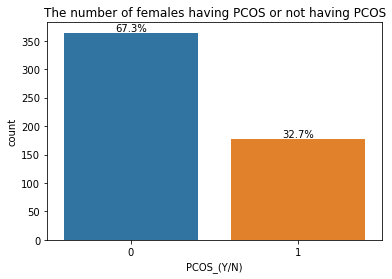

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the countplot
ax = sns.countplot(data=df, x='PCOS_(Y/N)')
plt.title('The number of females having PCOS or not having PCOS')

# Add percentage labels to each bar
total = len(df['PCOS_(Y/N)'])
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Show the plot
plt.show()


In [15]:
df.groupby(['Cycle(R/I)','PCOS_(Y/N)'])['PCOS_(Y/N)'].count()

Cycle(R/I)  PCOS_(Y/N)
2           0             308
            1              82
4           0              56
            1              95
Name: PCOS_(Y/N), dtype: int64

In [17]:
# Create the histogram plot
fig = px.histogram(df, x='Cycle(R/I)', color='PCOS_(Y/N)', barmode='group',
                   color_discrete_sequence=['#71AEC2', '#D58989'],
                   title='Distribution of regular and irregular cycle')


# Show the plot
fig.show()


Based on the given data, it appears that there is a relationship between the menstrual cycle and the presence or absence of PCOS.

Specifically, for cases with regular periods, there are 308 occurrences without PCOS and 82 occurrences with PCOS. On the other hand, for cases with irregular periods, there are 56 occurrences without PCOS and 95 occurrences with PCOS.

This shows that irregular menstrual cycles may be associated with a higher likelihood of PCOS, while regular menstrual cycles may be associated with a lower likelihood of PCOS.



In [18]:
fig = px.histogram(df, x='Reg.Exercise(Y/N)', color='PCOS_(Y/N)', barmode='group',
                   color_discrete_sequence=['#71AEC2', '#D58989'],
                   title='The effect of Regular Exercise on PCOS')

# Calculate percenta
# Show the plot
fig.show()


This shows that females with regular excercise have low risk of developing PCOS.

<AxesSubplot:ylabel='Density'>

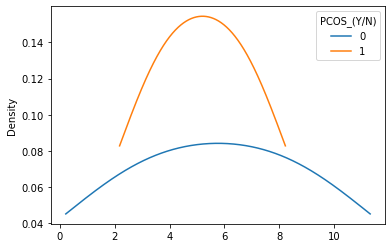

In [18]:
df.pivot_table(index='Cycle(R/I)',columns='PCOS_(Y/N)',values='FSH/LH',aggfunc='mean').plot(kind="kde")


This shows that the ratio FSH/LH is generally higher for females having PCOS.

Text(0.5, 1.0, 'Distribution of BMI achieved by PCOS')

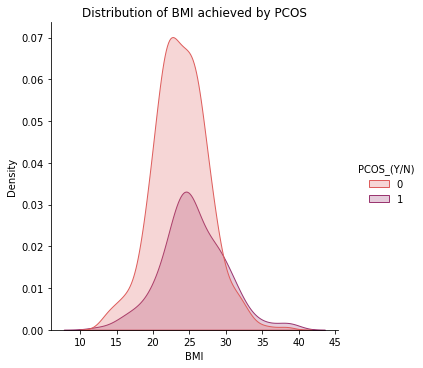

In [19]:
#Distribution of BMI
sns.displot(data=df,x='BMI',hue='PCOS_(Y/N)',palette='flare',kind='kde',fill=True)
plt.title('Distribution of BMI achieved by PCOS')


In [20]:
#Distribution of LH
fig = px.violin(df,x='PCOS_(Y/N)',y='LH(mIU/mL)',color='PCOS_(Y/N)',points='all',box=True,title='Distribution of LH by PCOS',color_discrete_sequence=['#71AEC2 ','#D58989'])
fig.update_yaxes(range=[-50, 50])  # Set the minimum and maximum values of the y-axis
fig.show()

In [21]:
#Distribution of FSH
fig = px.violin(df,x='PCOS_(Y/N)',y='FSH(mIU/mL)',color='PCOS_(Y/N)',points='all',box=True,title='Distribution of LH by PCOS',color_discrete_sequence=['#71AEC2 ','#D58989'])
fig.update_yaxes(range=[-100, 100])  # Set the minimum and maximum values of the y-axis
fig.show()

In [22]:
df.groupby(['Cycle_length(days)','PCOS_(Y/N)'])['PCOS_(Y/N)'].count()


Cycle_length(days)  PCOS_(Y/N)
0                   0               1
2                   0              11
                    1              27
3                   0              18
                    1              18
4                   0              24
                    1              37
5                   0             213
                    1              63
6                   0              80
                    1              11
7                   0               6
                    1              13
8                   0               1
                    1               1
9                   0               6
                    1               3
10                  1               1
11                  0               3
                    1               2
12                  0               1
                    1               1
Name: PCOS_(Y/N), dtype: int64

In [23]:
fig=px.pie(df,values='PCOS_(Y/N)',names='Cycle_length(days)',hole=.4,color_discrete_sequence=px.colors.sequential.RdBu,title='The effect of PCOS on cycle length')
fig.update_traces(textposition='inside',textinfo='percent+label')


This shows that the average length of menstrual cycle for a female having PCOS is 4-5 days.

In [24]:
df.groupby(['Weight_gain(Y/N)','PCOS_(Y/N)'])['PCOS_(Y/N)'].value_counts()

Weight_gain(Y/N)  PCOS_(Y/N)  PCOS_(Y/N)
0                 0           0             281
                  1           1              56
1                 0           0              83
                  1           1             121
Name: PCOS_(Y/N), dtype: int64

In [25]:
px.histogram(df,x='Weight_gain(Y/N)',color='PCOS_(Y/N)',barmode='group',color_discrete_sequence=['#71AEC2 ','#D58989'],title='The effect of PCOS on Weight gain')


In [26]:
df.groupby(['hair_growth(Y/N)','PCOS_(Y/N)'])['PCOS_(Y/N)'].value_counts()

hair_growth(Y/N)  PCOS_(Y/N)  PCOS_(Y/N)
0                 0           0             317
                  1           1              76
1                 0           0              47
                  1           1             101
Name: PCOS_(Y/N), dtype: int64

In [27]:
px.histogram(df,x='hair_growth(Y/N)',color='PCOS_(Y/N)',barmode='group',color_discrete_sequence=['#71AEC2 ','#D58989'],title='The effect of PCOS on hair growth')


This shows that women having PCOS have high risk of gaining weight and growth of body hairs.

Text(0.5, 1.0, 'Distribution of BMI achieved by PCOS')

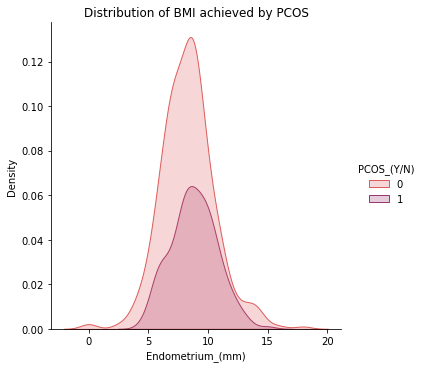

In [28]:
sns.displot(data=df,x='Endometrium_(mm)',hue='PCOS_(Y/N)',palette='flare',kind='kde',fill=True)
plt.title('Distribution of BMI achieved by PCOS')


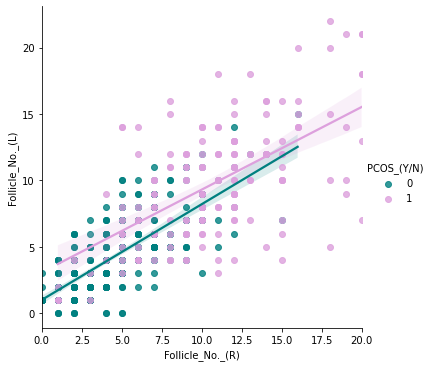

In [29]:
# Distribution of follicles in both ovaries.
color = ["teal", "plum"]
sns.lmplot(data =df,x='Follicle_No._(R)',y='Follicle_No._(L)', hue="PCOS_(Y/N)",palette=color)
plt.show()


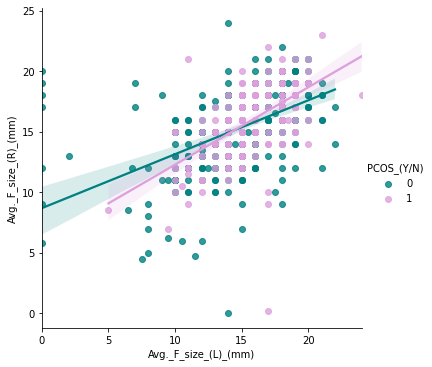

In [30]:
sns.lmplot(data =df,x='Avg._F_size_(L)_(mm)',y='Avg._F_size_(R)_(mm)', hue="PCOS_(Y/N)",palette=color)
plt.show()


In [31]:
X = df.drop(['PCOS_(Y/N)'], axis=1)
Y =df['PCOS_(Y/N)']

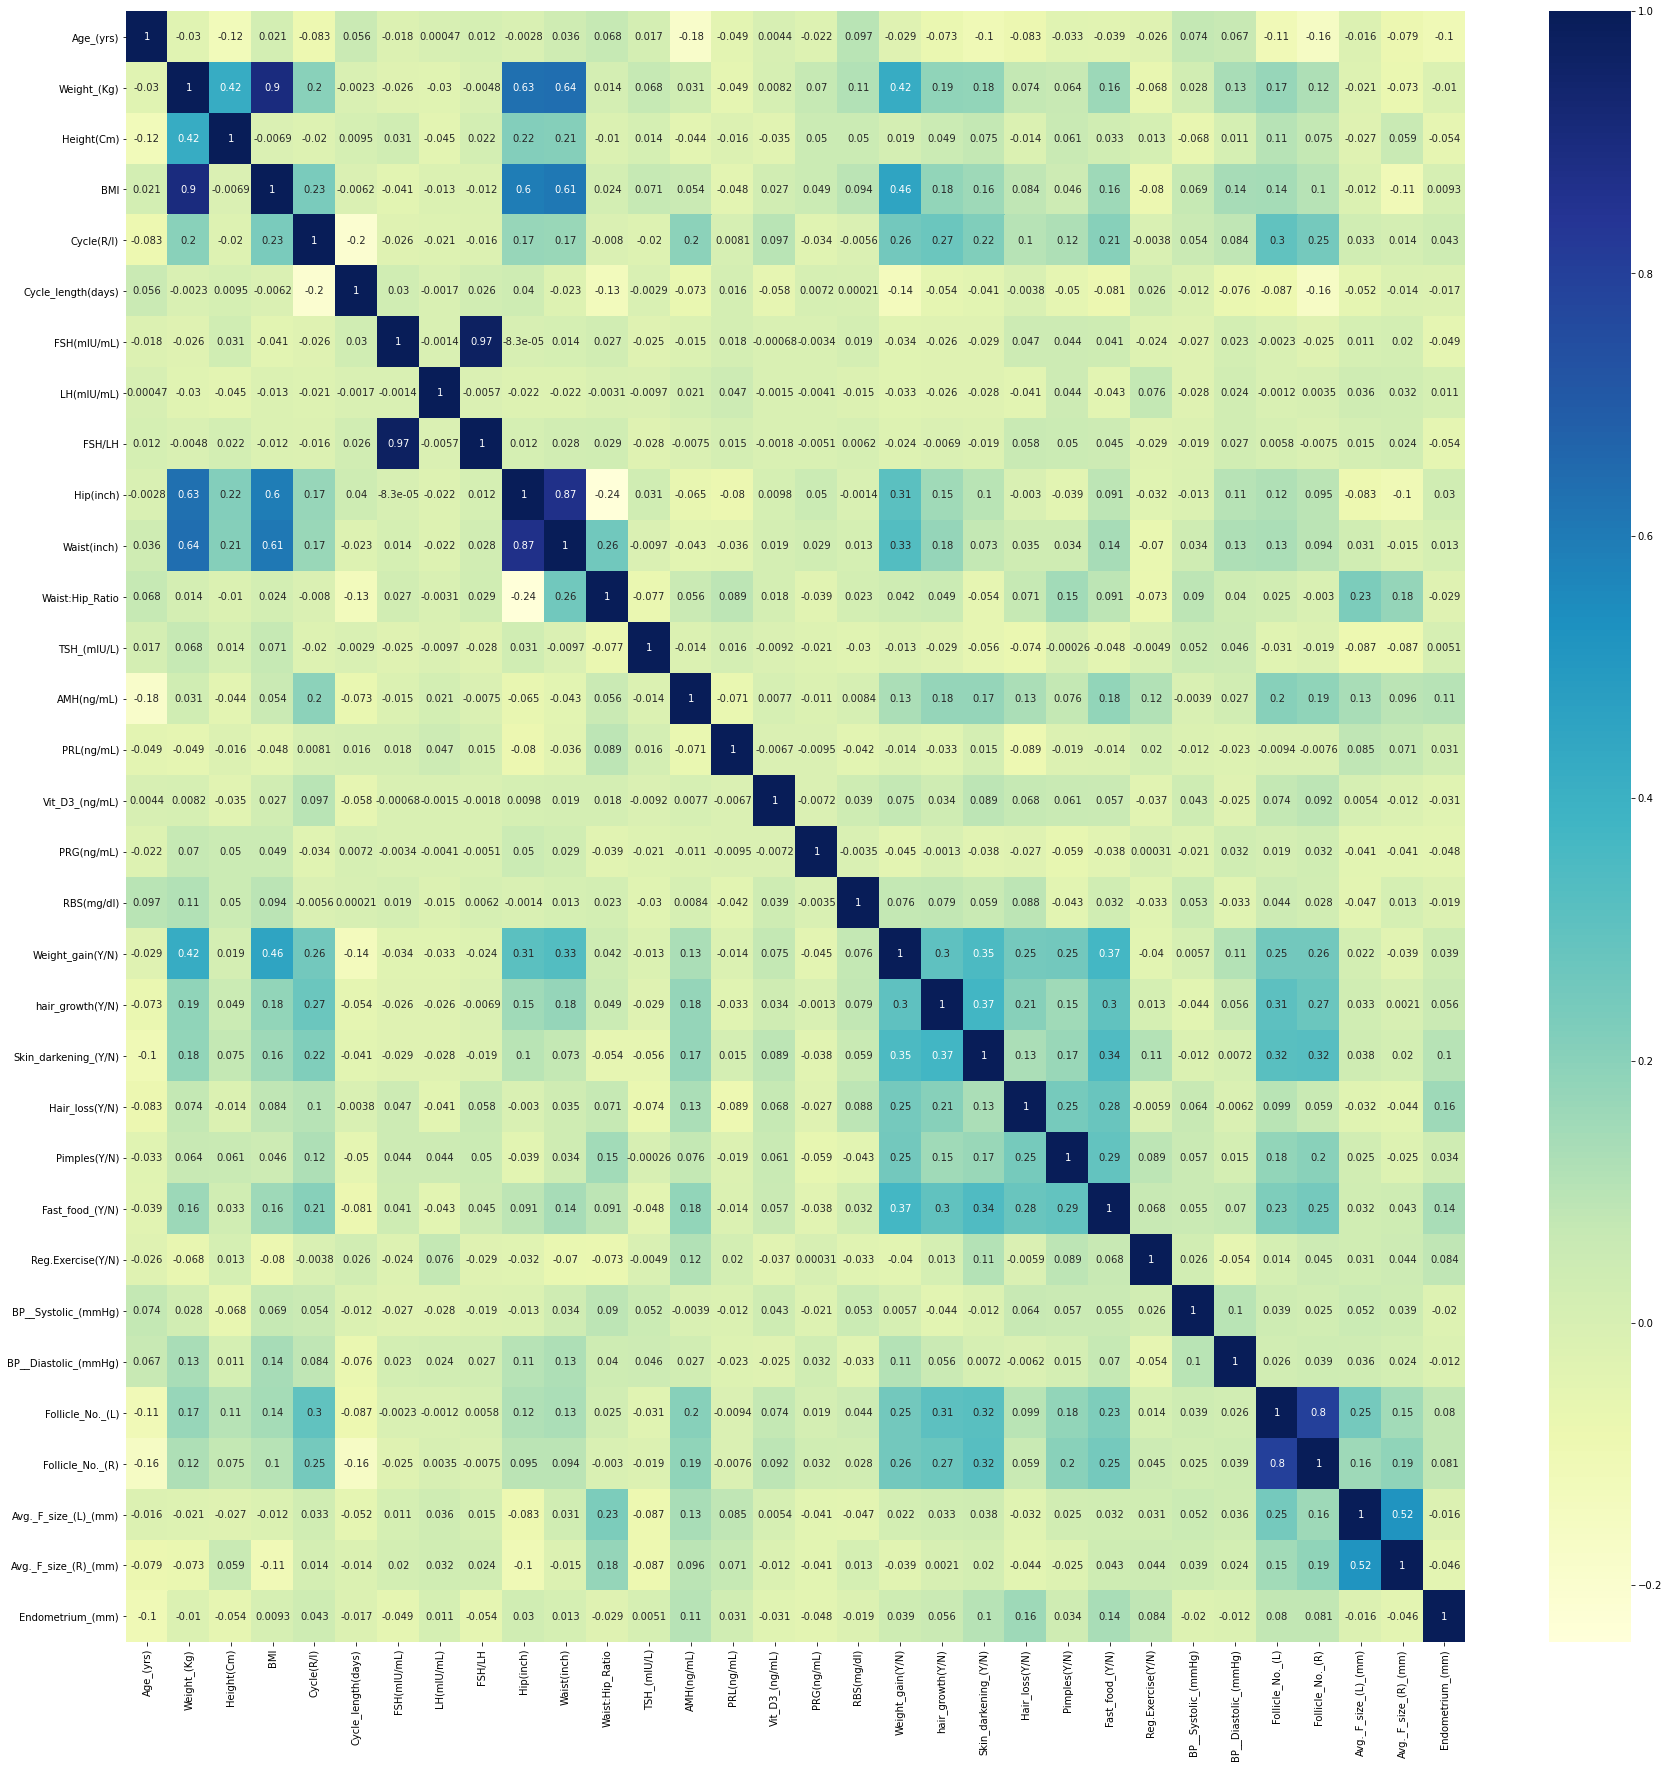

In [32]:
plt.figure(figsize=(30,30))
dataplot = sns.heatmap(X.corr() ,cmap = 'YlGnBu', annot=True)
plt.show()

In [33]:
corr_matrix = df.corr()
corr_matrix['PCOS_(Y/N)'].sort_values()

Cycle_length(days)     -0.178480
Age_(yrs)              -0.168513
PRG(ng/mL)             -0.043834
FSH(mIU/mL)            -0.030319
FSH/LH                 -0.018336
TSH_(mIU/L)            -0.010140
PRL(ng/mL)              0.005143
BP__Systolic_(mmHg)     0.007942
Waist:Hip_Ratio         0.012386
BP__Diastolic_(mmHg)    0.038032
RBS(mg/dl)              0.048922
LH(mIU/mL)              0.063879
Reg.Exercise(Y/N)       0.065337
Height(Cm)              0.068254
Vit_D3_(ng/mL)          0.085494
Avg._F_size_(R)_(mm)    0.097690
Endometrium_(mm)        0.106648
Avg._F_size_(L)_(mm)    0.132992
Hip(inch)               0.162297
Waist(inch)             0.164598
Hair_loss(Y/N)          0.172879
BMI                     0.199534
Weight_(Kg)             0.211938
AMH(ng/mL)              0.264361
Pimples(Y/N)            0.286077
Fast_food_(Y/N)         0.376183
Cycle(R/I)              0.400475
Weight_gain(Y/N)        0.441047
hair_growth(Y/N)        0.464667
Skin_darkening_(Y/N)    0.475733
Follicle_N

In [34]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


,features,vif_Factor
0,Age_(yrs),40.222448
1,Weight_(Kg),3940.693212
2,Height(Cm),16079.121818
3,BMI,3951.293406
4,Cycle(R/I),11.794163
5,Cycle_length(days),13.497512
6,FSH(mIU/mL),19.460067
7,LH(mIU/mL),1.028905
8,FSH/LH,19.582567
9,Hip(inch),15455.987845


## Feature Selection

In [35]:
#splitting features into categorical and continuous
categorical_df = df.select_dtypes(include=['int64'])
continuous_df = df.select_dtypes(include=['float64'])


In [36]:
#chi square feature selection for categorical features
from scipy.stats import chi2_contingency

# Perform chi-square feature selection
target_variable = 'PCOS_(Y/N)'

for column in categorical_df.columns:
    if column != target_variable:
        contingency_table = pd.crosstab(df[column], df[target_variable])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Create lists to store the feature, chi-square coefficient, and p-value
feature_list = []
chi2_list = []
p_value_list = []

for column in categorical_df.columns:
    if column != target_variable:
        contingency_table = pd.crosstab(df[column], df[target_variable])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        feature_list.append(column)
        chi2_list.append(chi2)
        p_value_list.append(p_value.round(8))

# Create a DataFrame from the lists
df_chi2 = pd.DataFrame({'Feature': feature_list, 'Chi-square': chi2_list, 'P-value': p_value_list})

# Print the DataFrame
df_chi2

,Feature,Chi-square,P-value
0,Age_(yrs),48.795769,0.008785
1,Cycle(R/I),84.873422,0.000000
2,Cycle_length(days),95.953325,0.000000
3,Hip(inch),44.089262,0.000560
4,Waist(inch),44.394491,0.003165
5,Weight_gain(Y/N),103.306113,0.000000
6,hair_growth(Y/N),114.598989,0.000000
7,Skin_darkening_(Y/N),120.251400,0.000000
8,Hair_loss(Y/N),15.437094,0.000085
9,Pimples(Y/N),43.064042,0.000000


In [37]:
selected_features_1 = []
for column in categorical_df.columns:
    if column != target_variable:
        contingency_table = pd.crosstab(df[column], df[target_variable])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        if p_value < 0.05:  # Adjust the significance level as needed
            selected_features_1.append(column)
print("Selected features : ",selected_features_1)

Selected features :  ['Age_(yrs)', 'Cycle(R/I)', 'Cycle_length(days)', 'Hip(inch)', 'Waist(inch)', 'Weight_gain(Y/N)', 'hair_growth(Y/N)', 'Skin_darkening_(Y/N)', 'Hair_loss(Y/N)', 'Pimples(Y/N)', 'Follicle_No._(L)', 'Follicle_No._(R)']


In [38]:
#Lasso regression for feature selection in continous features
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(continuous_df, df['PCOS_(Y/N)'], test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model with L1 regularization (Lasso)
logreg = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model on the training data
logreg.fit(X_train_scaled, y_train)

# Retrieve the coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = continuous_df.columns


# Create a DataFrame for features and coefficients
df_feature_coeff = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Select the features with non-zero coefficients
selected_features_2 = [feature for feature, coef in zip(feature_names, coefficients) if coef != 0]
print("Selected features : ",selected_features_2)
df_feature_coeff

Selected features :  ['Weight_(Kg)', 'Height(Cm)', 'LH(mIU/mL)', 'FSH/LH', 'Waist:Hip_Ratio', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit_D3_(ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Fast_food_(Y/N)', 'Avg._F_size_(L)_(mm)', 'Avg._F_size_(R)_(mm)', 'Endometrium_(mm)']


,Feature,Coefficient
0,Weight_(Kg),0.395965
1,Height(Cm),0.036978
2,BMI,0.000000
3,FSH(mIU/mL),0.000000
4,LH(mIU/mL),0.209835
5,FSH/LH,-0.140000
6,Waist:Hip_Ratio,-0.150934
7,TSH_(mIU/L),0.000000
8,AMH(ng/mL),0.585742
9,PRL(ng/mL),0.144965


In [39]:
# Create a new DataFrame with selected features from the first list
df_selected1 = df.loc[:, selected_features_1]

# Create a new DataFrame with selected features from the second list
df_selected2 = df.loc[:, selected_features_2]

# Concatenate the two DataFrames along the columns axis
X = pd.concat([df_selected1, df_selected2], axis=1)

# Print the new DataFrame
X

,Age_(yrs),Cycle(R/I),Cycle_length(days),Hip(inch),Waist(inch),Weight_gain(Y/N),hair_growth(Y/N),Skin_darkening_(Y/N),Hair_loss(Y/N),Pimples(Y/N),...,Waist:Hip_Ratio,AMH(ng/mL),PRL(ng/mL),Vit_D3_(ng/mL),PRG(ng/mL),RBS(mg/dl),Fast_food_(Y/N),Avg._F_size_(L)_(mm),Avg._F_size_(R)_(mm),Endometrium_(mm)
0,28,2,5,36,30,0,0,0,0,0,...,0.833333,2.07,45.16,17.1,0.57,92.0,1.0,18.0,18.0,8.5
1,36,2,5,38,32,0,0,0,0,0,...,0.842105,1.53,20.09,61.3,0.97,92.0,0.0,15.0,14.0,3.7
2,33,2,5,40,36,0,0,0,1,1,...,0.900000,6.63,10.52,49.7,0.36,84.0,1.0,18.0,20.0,10.0
3,37,2,5,42,36,0,0,0,0,0,...,0.857143,1.22,36.90,33.4,0.36,76.0,0.0,15.0,14.0,7.5
4,25,2,5,37,30,0,0,0,1,0,...,0.810811,2.26,30.09,43.8,0.38,84.0,0.0,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,35,2,5,28,26,0,0,0,0,0,...,0.928571,1.70,5.30,36.6,0.25,92.0,0.0,17.5,10.0,6.7
537,30,2,5,34,32,1,0,0,0,0,...,0.941176,5.60,21.09,23.0,0.25,108.0,0.0,19.0,18.0,8.2
538,36,2,6,30,28,0,0,0,0,0,...,0.933333,3.70,96.41,22.5,0.25,92.0,0.0,18.0,9.0,7.3
539,27,4,2,28,26,0,0,0,0,1,...,0.928571,5.20,38.89,22.4,0.25,115.0,0.0,18.0,16.0,11.5


In [40]:
Y = df['PCOS_(Y/N)']









## FEATURE EXTRACTION : PRINCIPLE COMPONENT ANALYSIS (PCA)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA object with the desired number of components
pca = PCA(n_components=0.95, whiten=True, random_state=42)

# Fit the PCA model to the scaled data
pca.fit(X_scaled)

# Transform the data to the principal components
X_pca = pca.transform(X_scaled)

np.cumsum(pca.explained_variance_ratio_)


array([0.14760778, 0.24029566, 0.30689032, 0.36234358, 0.40831525,
       0.45337985, 0.49507625, 0.53641716, 0.57547525, 0.61387959,
       0.65111529, 0.68825394, 0.72466232, 0.76040784, 0.79099514,
       0.82055908, 0.84892464, 0.87650134, 0.90053766, 0.92387036,
       0.945575  , 0.96441913])

In [42]:
X_pca.shape

(541, 22)

## LOGISTIC REGRESSION

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score,mean_squared_error,precision_score
from sklearn.metrics import log_loss

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Define the hyperparameters to tune
parameters = {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, parameters, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)



Best Parameters: {'C': 10.0, 'penalty': 'l2'}
Best Score: 0.9004009623095428


In [44]:
# Train the logistic regression model with the best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the accuracy
log_accuracy = accuracy_score(y_test, y_pred)

# Calculate the log loss
log_log = log_loss(y_test, y_pred)

# Calculate the F1 score
log_f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the recall score
log_recall = recall_score(y_test, y_pred, average='weighted')

#Calculate the precision
log_pre = precision_score(y_test,y_pred)

# Create a DataFrame for the evaluation metrics
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'Log Loss'],
                           'Value': [log_accuracy, log_recall, log_pre, log_f1, log_log]})
metrics_df

,Metric,Value
0,Accuracy,0.880734
1,Recall,0.880734
2,Precision,0.851852
3,F1 Score,0.877556
4,Log Loss,4.119333


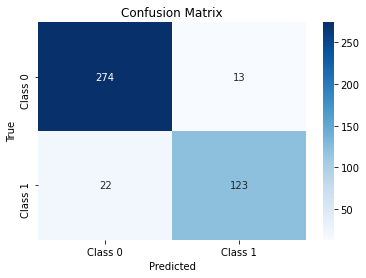

In [45]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_train, best_model.predict(X_train))

# Define class labels
labels = ['Class 0', 'Class 1']

# Create a seaborn heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set plot labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

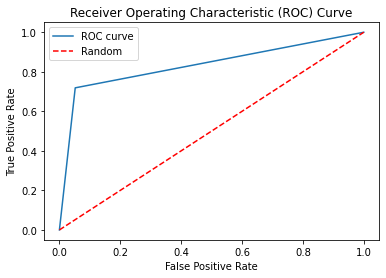

In [46]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## RANDOM FOREST 

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [77]:
# Create a Random Forest classifier with the best hyperparameters
rf_best = RandomForestClassifier(**best_params)

# Fit the model on the training data
rf_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pre = rf_best.predict(X_test)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, y_pre)

# Calculate the log loss
rf_log = log_loss(y_test, y_pre)

# Calculate the F1 score
rf_f1 = f1_score(y_test, y_pre, average='weighted')

# Calculate the recall score
rf_recall = recall_score(y_test, y_pre, average='weighted')

#Calculate the precision
rf_pre = precision_score(y_test, y_pre)

# Create a DataFrame for the evaluation metrics
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'Log loss'],
                           'Value': [rf_accuracy, rf_recall, rf_pre, rf_f1, rf_log]})

# Print the DataFrame
metrics_df

,Metric,Value
0,Accuracy,0.899083
1,Recall,0.899083
2,Precision,0.920000
3,F1 Score,0.895080
4,Log loss,3.485579


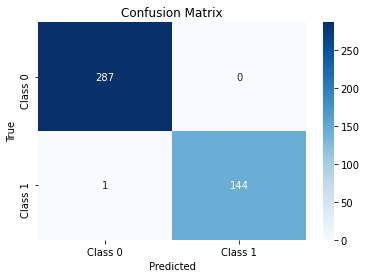

In [78]:
# Create a confusion matrix
cm = confusion_matrix(y_train, rf_best.predict(X_train))

# Define class labels
labels = ['Class 0', 'Class 1']

# Create a seaborn heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set plot labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


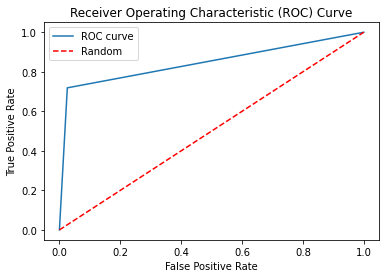

In [63]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pre)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## K-Nearest Neighbors (KNN)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [65]:
# Create a KNN classifier with the best hyperparameters
knn_best = KNeighborsClassifier(**best_params)

# Fit the model on the training data
knn_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_best.predict(X_test)

# Calculate the accuracy
knn_accuracy = accuracy_score(y_test, y_pred)

# Calculate the log loss
knn_log = log_loss(y_test, y_pred)

# Calculate the F1 score
knn_f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the recall score
knn_recall = recall_score(y_test, y_pred, average='weighted')

#Calculate the precision
knn_pre = precision_score(y_test, y_pred)

# Create a DataFrame for the evaluation metrics
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'Log loss'],
                           'Value': [knn_accuracy, knn_recall, knn_pre, knn_f1, knn_log]})

# Print the DataFrame
metrics_df

,Metric,Value
0,Accuracy,0.844037
1,Recall,0.844037
2,Precision,0.857143
3,F1 Score,0.833051
4,Log loss,5.386804


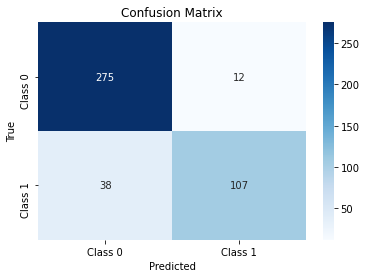

In [66]:
# Create a confusion matrix
cm = confusion_matrix(y_train, knn_best.predict(X_train))

# Define class labels
labels = ['Class 0', 'Class 1']

# Create a seaborn heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set plot labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


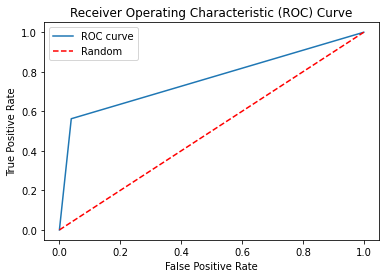

In [67]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Gaussian Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'var_smoothing': 1e-09}


In [83]:
# Create a Gaussian Naive Bayes classifier with the best hyperparameters
gnb_best = GaussianNB(**best_params)

# Fit the model on the training data
gnb_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb_best.predict(X_test)

# Calculate the accuracy
gnb_accuracy = accuracy_score(y_test, y_pred)

# Calculate the log loss
gnb_log = log_loss(y_test, y_pred)

# Calculate the F1 score
gnb_f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate the recall score
gnb_recall = recall_score(y_test, y_pred, average='weighted')

#Calculate the precision
gnb_pre = precision_score(y_test, y_pred)

# Create a DataFrame for the evaluation metrics
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'Log loss'],
                           'Value': [gnb_accuracy, gnb_recall, gnb_pre, gnb_f1, gnb_log]})

# Print the DataFrame
metrics_df

,Metric,Value
0,Accuracy,0.853211
1,Recall,0.853211
2,Precision,0.863636
3,F1 Score,0.844095
4,Log loss,5.069934


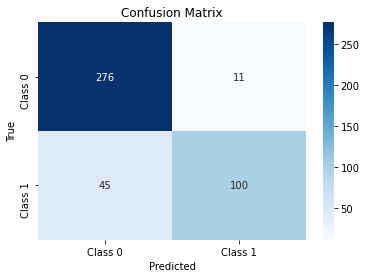

In [81]:
# Create a confusion matrix
cm = confusion_matrix(y_train, gnb_best.predict(X_train))

# Define class labels
labels = ['Class 0', 'Class 1']

# Create a seaborn heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set plot labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


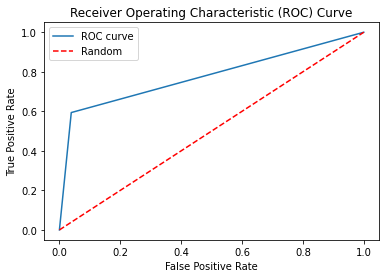

In [71]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [79]:
# Create a DataFrame for the comparison
comparison_df = pd.DataFrame({
    'Classifier': ['Logistic Regression', 'Random Forest', 'KNN', 'Gaussian Naive Bayes'],
    'Accuracy': [log_accuracy, rf_accuracy, knn_accuracy, gnb_accuracy],
    'Recall': [log_recall, rf_recall, knn_recall, gnb_recall],
    'Precision' : [log_pre, rf_pre, knn_pre, gnb_pre],
    'F1 score': [log_f1, rf_f1, knn_f1, gnb_f1],
    'Log loss': [log_log, rf_log, knn_log, gnb_log]
})

# Print the DataFrame
comparison_df

,Classifier,Accuracy,Recall,Precision,F1 score,Log loss
0,Logistic Regression,0.880734,0.880734,0.851852,0.877556,4.119333
1,Random Forest,0.899083,0.899083,0.920000,0.895080,3.485579
2,KNN,0.844037,0.844037,0.857143,0.833051,5.386804
3,Gaussian Naive Bayes,0.853211,0.853211,0.863636,0.844095,5.069934
